This notebooko demonstrates the basic use of the EBL photon density class and how to load a model included in the package

In [1]:
%matplotlib inline

# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ebltable.ebl_from_model import EBL
import astropy.units as u

In [3]:
import astropy.constants as c

# Initiate the class plot an example

The easiest way is to import the attenuation from an EBL model. Available models are:

| EBL model id | Model ref.   | Web link |
|------|------|------|
|   dominguez  | Dominguez et al. (2012) | |
|   dominguez-upper  | Dominguez et al. (2012) | upper uncertainty bound|
|   dominguez-lower  | Dominguez et al. (2012) | lower uncertainty bound|
|   franceschini  | Franceschini et al. (2008) |http://www.astro.unipd.it/background/ |
|   finke | Finke et al. (2012) | http://www.phy.ohiou.edu/~finke/EBL/ |
|   finke2022 | Finke et al. (2022) | https://zenodo.org/record/702307 |
| saldana-lopez     |   Saldana-Lopez et al. (2021) | https://www.ucm.es/blazars/ebl |
| saldana-lopez-err  |  Saldana-Lopez et al. (2021) uncertainties | https://www.ucm.es/blazars/ebl |
| kneiske | Kneiske & Dole (2010) | |
| gilmore | Gilmore et al. (2012)	|	fiducial model |
| gilmore-fixed | Gilmore et al. (2012)	|	fixed model |
| inoue | Inuoe et al. (2013)	| http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-low-pop3 | Inuoe et al. (2013)	| Low pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-up-pop3 | Inuoe et al. (2013)	| High pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |
| cuba | Haardt & Madau (2012)	| http://www.ucolick.org/~pmadau/CUBA/HOME.html |



In [4]:
ebl = {}
for m in EBL.get_models():
    ebl[m] = EBL.readmodel(m)

Define some redshifts and energies for the interpolation:

In [5]:
z = np.arange(0.,1.2,0.2)
lmu = np.logspace(-1,3.,100)

Calculate the EBL photon density for all models:

In [6]:
nuInu = {}
for m, e in ebl.items():
    nuInu[m] = e.ebl_array(z,lmu)

/Users/manuelmeyer/Python/ebltable/ebltable/ebl_from_model.py:364: RuntimeWarning: Warning: a z value is below interpolation range, zmin = 0.00
  if np.any(z < self._z[0]): warnings.warn(


### Do the plot

For one EBL model

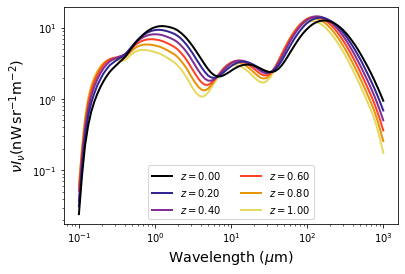

In [7]:
m = 'finke2022'

for i,zz in enumerate(z):
    plt.loglog(lmu,nuInu[m][i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
               lw = 2.,
              label = '$z = {0:.2f}$'.format(zz), 
              zorder= -1 * i)
    
plt.gca().set_xlabel('Wavelength ($\mu$m)',size = 'x-large')
plt.gca().set_ylabel(r'$\nu I_\nu (\mathrm{nW}\,\mathrm{sr}^{-1}\mathrm{m}^{-2})$',size = 'x-large')
plt.legend(loc = 'lower center', ncol = 2)

## Plot the EBL photon density $dn / d\epsilon$ instead $\nu I_\nu$

convert the wavelength in micrometer to energy in eV:

In [8]:
EeV = (c.c.to(u.um / u.s) / (lmu * u.um) * c.h).to(u.eV).value

In [9]:
n = ebl[m].n_array(z,EeV)

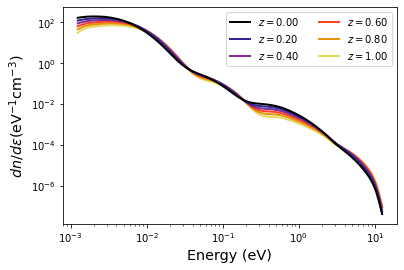

In [10]:
for i,zz in enumerate(z):
    plt.loglog(EeV,n[i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
               lw = 2.,
              label = '$z = {0:.2f}$'.format(zz), 
              zorder= -1 * i)
plt.gca().set_xlabel('Energy (eV)',size = 'x-large')
plt.gca().set_ylabel(r'$dn/d\epsilon (\mathrm{eV}^{-1}\mathrm{cm}^{-3})$',size = 'x-large')
plt.legend(loc = 'upper right', ncol = 2)

Print the integrated EBL photon density:

In [11]:
ebl[m].ebl_int(0., lmin = 0.01, lmax = 1e3)

17.66974687332257

Write the EBL values in a fits file:

In [12]:
ebl[m].writefits('out.fits', z, lmu)

# Compare all models

/Users/manuelmeyer/Python/ebltable/ebltable/ebl_from_model.py:364: RuntimeWarning: Warning: a z value is below interpolation range, zmin = 0.00
  if np.any(z < self._z[0]): warnings.warn(


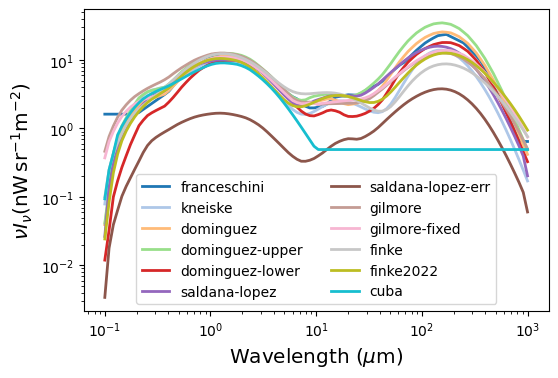

In [13]:
plt.figure(dpi=100)

z = 0.

for i,m in enumerate(ebl.keys()):
    plt.loglog(lmu,ebl[m].ebl_array(z, lmu),
              ls = '-', 
               color = plt.cm.tab20(i / float(len(ebl.keys()))),
               lw = 2.,
              label = f'{m}')
    
plt.gca().set_xlabel('Wavelength ($\mu$m)',size = 'x-large')
plt.gca().set_ylabel(r'$\nu I_\nu (\mathrm{nW}\,\mathrm{sr}^{-1}\mathrm{m}^{-2})$',size = 'x-large')
plt.legend(loc = 'lower center', ncol = 2)